## Lecture 07 - Tree Model, CART, Random Forest

### Install packages 
```pip install pydotplus```

```pip install graphviz```

#### Mac Command line
``` brew install graphviz```

#### For windows

Install windows package from: https://graphviz.gitlab.io/_pages/Download/Download_windows.html

Install python graphviz package

Add C:\Program Files (x86)\Graphviz2.38\bin to User path

Add C:\Program Files (x86)\Graphviz2.38\bin\dot.exe to System Path


In [ ]:
import pandas as pd
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
import numpy as np

### 1. Data Preprocessing

### 1.1 Load Data

In [ ]:
car = pd.read_csv("Data/car.data", header=None)

In [ ]:
car

In [ ]:
car.columns=["buying", "maint", "doors", "persons", "lug_root", "safty", "class"] #Rename the columns

In [ ]:
car.head(10)

In [ ]:
X=car[["buying", "maint", "doors", "persons", "lug_root", "safty"]]
y=car["class"]

In [ ]:
y.unique()

In [ ]:
ybin=y.copy()
ybin.loc[ybin!= "unacc"] = "acc" 

In [ ]:
ybin.unique()

In [ ]:
ysimp=pd.get_dummies(ybin)['acc']

In [ ]:
ysimp

### 1.2 One-hot encoding

In [ ]:
buying_1hot = pd.get_dummies(X['buying'], prefix = 'buying')

In [ ]:
np.unique(X['buying'])

In [ ]:
buying_1hot

In [ ]:
maint_1hot = pd.get_dummies(X['maint'], prefix = 'maint')
doors_1hot = pd.get_dummies(X['doors'], prefix = 'doors')
persons_1hot = pd.get_dummies(X['persons'], prefix = 'persons')
lug_root_1hot = pd.get_dummies(X['lug_root'], prefix = 'lug_root')
safty_1hot = pd.get_dummies(X['safty'], prefix = 'safty')

In [ ]:
X1hot=pd.concat([safty_1hot, maint_1hot, buying_1hot, doors_1hot, persons_1hot, lug_root_1hot], axis=1)
X1hot.head(10)

In [ ]:
X1hot.shape

In [ ]:
X.shape

### 2.Build a Single Tree

In [82]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_leaf=100)
# Train Decision Tree Classifer
clf = clf.fit(X1hot, ybin)

[Text(223.20000000000002, 190.26, 'X[15] <= 0.5\nentropy = 0.881\nsamples = 1728\nvalue = [518, 1210]'),
 Text(167.4, 135.9, 'X[1] <= 0.5\nentropy = 0.993\nsamples = 1152\nvalue = [518, 634]'),
 Text(111.60000000000001, 81.53999999999999, 'X[6] <= 0.5\nentropy = 0.91\nsamples = 768\nvalue = [518, 250]'),
 Text(55.800000000000004, 27.180000000000007, 'entropy = 0.77\nsamples = 576\nvalue = [446, 130]'),
 Text(167.4, 27.180000000000007, 'entropy = 0.954\nsamples = 192\nvalue = [72, 120]'),
 Text(223.20000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 384\nvalue = [0, 384]'),
 Text(279.0, 135.9, 'entropy = 0.0\nsamples = 576\nvalue = [0, 576]')]

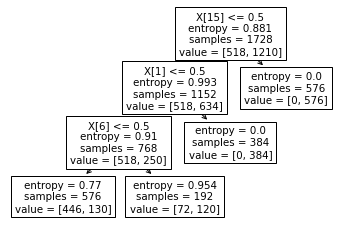

In [83]:
tree.plot_tree(clf)

In [74]:
X1hot.columns[15]

'persons_2'

In [70]:
518/1152

0.4496527777777778

In [71]:
np.unique(clf.predict_proba(X1hot)[:, 0])

array([0.        , 0.44965278])

### 3. Build From Scratch: Checking the First Split

### $H= \sum\limits_{i=1}^c p_i log(p_i)$

In [ ]:
def entropy(y): #Define Function to Calculate Entropy
    p1 = float(y.sum())/float(len(y))+1e-20
    return -(p1*np.log2(p1)+(1-p1)*np.log2(1-p1))

In [ ]:
entropy(ysimp) #entropy at the parent node

In [ ]:
def Dentropy(data, y, splitter):  #Entropy Change after Splits
    yleft=y[data[splitter]<0.5]   #filter out the data points that goes to left
    yright=y[data[splitter]>=0.5] #filter the data points that goes to right
    H2=(len(yleft)*entropy(yleft)+len(yright)*entropy(yright))/float(len(yleft)+len(yright)) #Average Entropy after split
    H1=entropy(y) #Entropy before splits
    dH= H1-H2
    return (dH, entropy(yleft), entropy(yright))

In [67]:
Dentropy(X1hot, ysimp, 'safty_low')

(0.2192253676327236, 0.9926735794544486, 6.643856189774724e-19)

In [66]:
feature_cols=list(X1hot.columns)
for i in feature_cols: # Try different variables at the first split
    print(i+": "+str(Dentropy(X1hot, ysimp, i)))

safty_high: (0.08023239852243158, 0.7016893176251701, 0.998947430989433)
safty_low: (0.2192253676327236, 0.9926735794544486, 6.643856189774724e-19)
safty_med: (0.010901773506560186, 0.8260644563036537, 0.9581890286800804)
maint_high: (0.0008215712835362154, 0.8915996278279094, 0.8459458471248849)
maint_low: (0.00710336330581629, 0.8459458471248849, 0.9577800211448371)
maint_med: (0.00710336330581629, 0.8459458471248849, 0.9577800211448371)
maint_vhigh: (0.021961018892401096, 0.928721506174933, 0.6500224216483541)
buying_high: (0.002905558653374607, 0.9003768855567087, 0.8112781244591328)
buying_low: (0.0117446646940631, 0.8348333467992206, 0.972552316568843)
buying_med: (0.00710336330581629, 0.8459458471248849, 0.9577800211448371)
buying_vhigh: (0.021961018892401096, 0.928721506174933, 0.6500224216483541)
doors_2: (0.00347998859509302, 0.9020845092877795, 0.8038575334990463)
doors_3: (3.826987595578757e-05, 0.8786338722412663, 0.8879763195151349)
doors_4: (0.000670161633379851, 0.87086

### 4. Random Forest to Predict House Price

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
houseprice = pd.read_csv('Data/housetrain.csv')

In [91]:
houseprice.shape

(1460, 81)

In [92]:
houseprice.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [93]:
y = houseprice['SalePrice']
predictor_cols = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt']

# Create training predictors data
train_X = houseprice[predictor_cols]

### 4.1 In Sample Model

In [121]:
rf = RandomForestRegressor(n_estimators = 1000, max_features="sqrt", max_samples=0.8, max_depth=None, random_state = 42)
# Train the model on training data
rf.fit(train_X, y);

In [ ]:
tree.plot_tree(rf.estimators_[0])

In [ ]:
tree.plot_tree(rf.estimators_[1])

In [ ]:
rf.feature_importances_

In [122]:
houseprice['ypred']=rf.predict(train_X)

In [123]:
error=np.sqrt(np.dot((y-houseprice['ypred']), (y-houseprice['ypred'])))
print(error)

676598.1561598771


In [ ]:
690408.9684587391

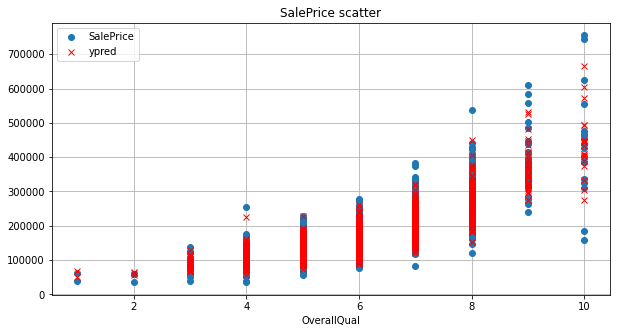

In [120]:
import matplotlib.pyplot as plt
houseprice.plot(x='OverallQual', y=['SalePrice', 'ypred'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('SalePrice scatter')
plt.show()

### 4.2 Cross Validation 

In [124]:
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
kf = KFold(n_splits=10)
houseprice_shuffle=shuffle(houseprice)

y_shuffle = houseprice_shuffle['SalePrice']
predictor_cols = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt']
# Create training predictors data
train_X_shuffle = houseprice_shuffle[predictor_cols]

In [134]:
errorls=[]
for ntrees in [10, 50, 100, 500, 1000]:
    y_pred_cv= np.empty((0, 1))
    rf = RandomForestRegressor(n_estimators = ntrees, max_features="sqrt", max_samples=0.8, max_depth=None)
    for train, test in kf.split(train_X_shuffle):
        rf_modelcv=rf.fit(train_X_shuffle.iloc[train], y_shuffle.iloc[train]);
        y_pred_cv=np.append(y_pred_cv,rf_modelcv.predict(train_X_shuffle.iloc[test]))
    errorls.append(np.sqrt(np.dot(y_pred_cv-y_shuffle, y_pred_cv-y_shuffle)/len(y_shuffle)))

In [ ]:
houseprice_shuffle['y_pred_cv']=y_pred_cv
houseprice_shuffle['residual']=houseprice_shuffle['y_pred_cv']-houseprice_shuffle['SalePrice']

In [ ]:
houseprice_shuffle.plot(x='OverallQual', y=['residual'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('SalePrice scatter')
plt.show()

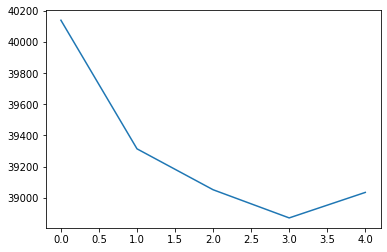

In [136]:
plt.plot(errorls)
plt.show()